<a href="https://colab.research.google.com/github/Dena7Qatry/heart-disease-svm/blob/main/heart_disease_svm_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Use support vector machine to classify the patients into 0 = no disease, 1 = presence of disease


In [12]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
%matplotlib inline


In [ ]:
%cd /content/drive/MyDrive/BSBI/BSBI intro to AI/Session 4- SVM
df=pd.read_csv("heart_disease_.csv")

/content/drive/MyDrive/BSBI/BSBI intro to AI/Session 4- SVM


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


## Data exploration

Explore the loaded heart disease dataset to understand its characteristics.


In [ ]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check data types
print("\nData Types:")
df.info()

Shape of the DataFrame: (303, 14)

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Summarize descriptive statistics
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,2.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,0.600660,0.663366,1.831683,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,0.956705,0.499120
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [ ]:
features=df.drop(['target'])

Target Variable Distribution:


Text(0.5, 1.0, 'Distribution of Target Variable')

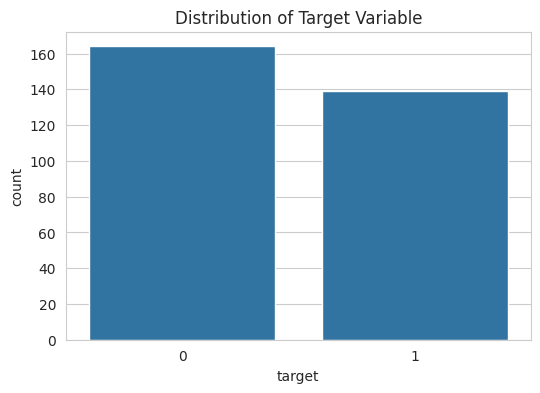

In [ ]:
# Analyze the distribution of the target variable
print("Target Variable Distribution:")
plt.figure(figsize=(6, 4))
sns.countplot(data=df,x="target")
plt.title("Distribution of Target Variable")

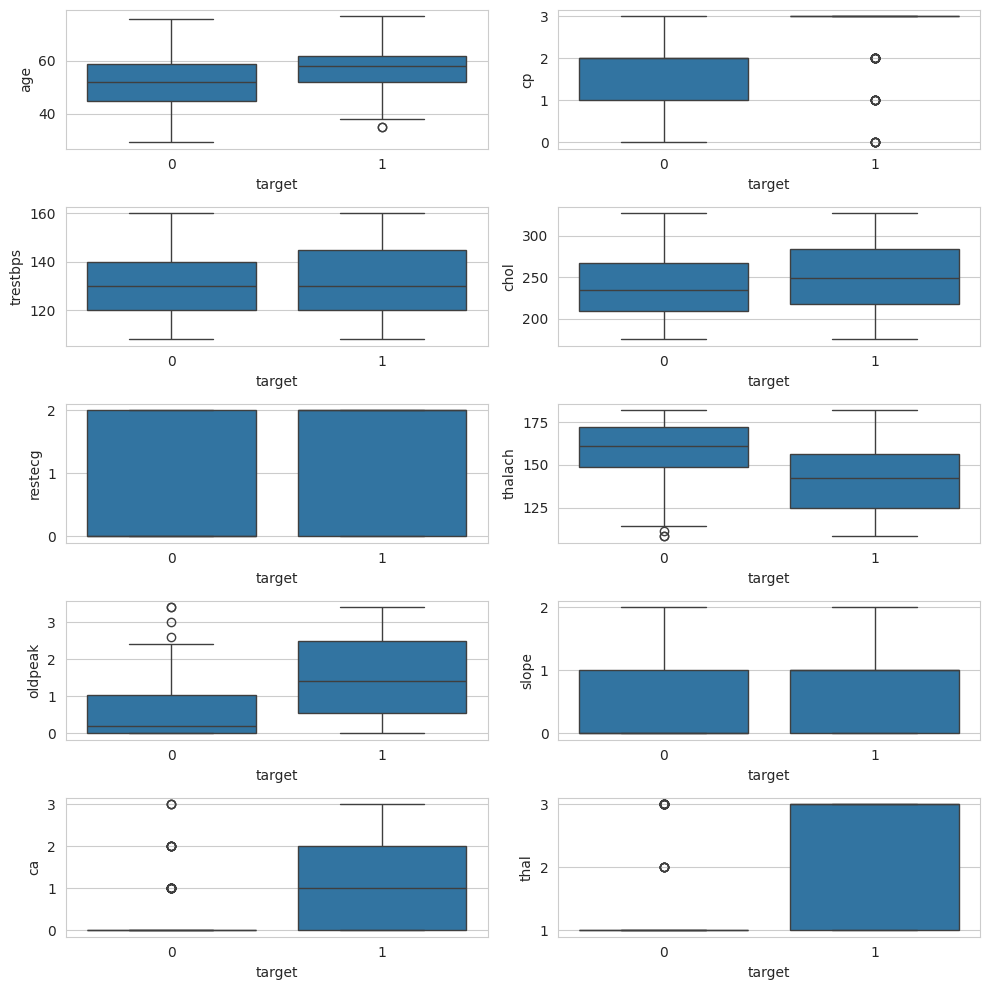

In [15]:
# Explore relationships between features and the target
numerical_features=['age','cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']
fig,ax=plt.subplots(5,2,figsize=(10,10))
for i,subplot in zip(numerical_features,ax.flatten()):
  sns.boxplot(data=df, x='target',y=i,ax=subplot)
plt.tight_layout() #to avoid the subplots overlapping and their titles


From the above graph, we can detect some outliers.


<Axes: >

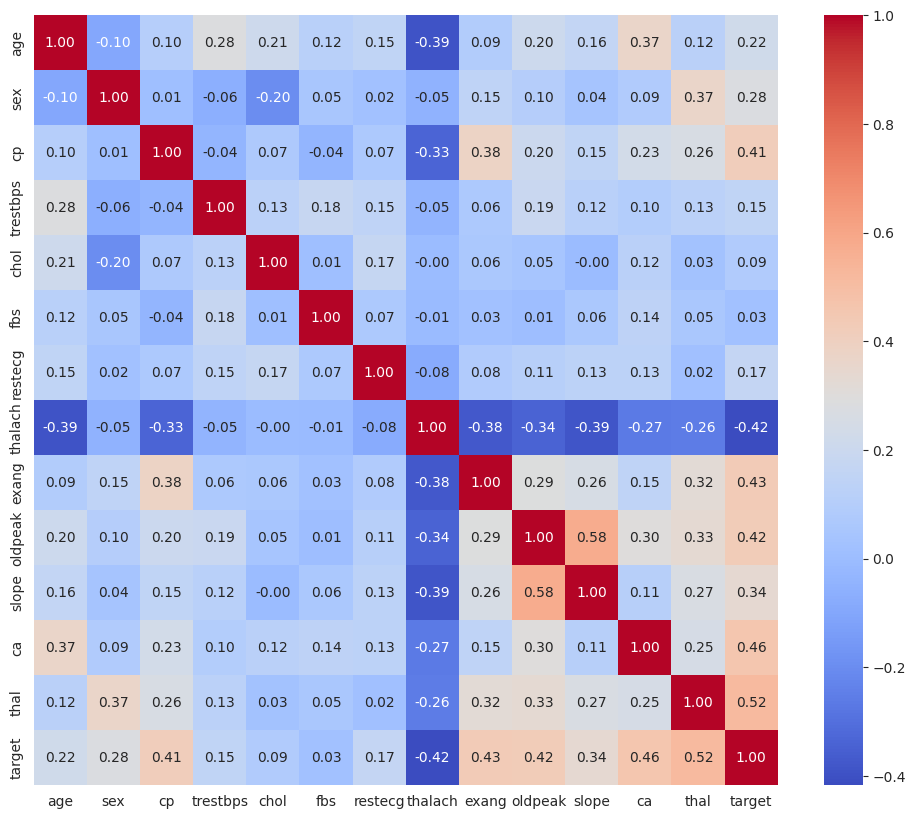

In [ ]:
# Investigate correlations between features for feature selection
# Correlation heat map or recursive feature elimination
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')


## Data cleaning

### Subtask:
Cleaning the data by handling missing values and outliers.


In [ ]:
#check for null values:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


No missing values were found , so no imputation is needed.


In [ ]:
#Handling Outliers using wisnorizing:
features=['cp', 'trestbps', 'chol', 'thalach', 'oldpeak','ca', 'thal']
for col in features:
  upper_limit = df[col].quantile(0.95)  # Calculate 95th percentile
  lower_limit = df[col].quantile(0.05)  # Calculate 5th percentile
  df[col]=df[col].clip(lower=lower_limit, upper=upper_limit)

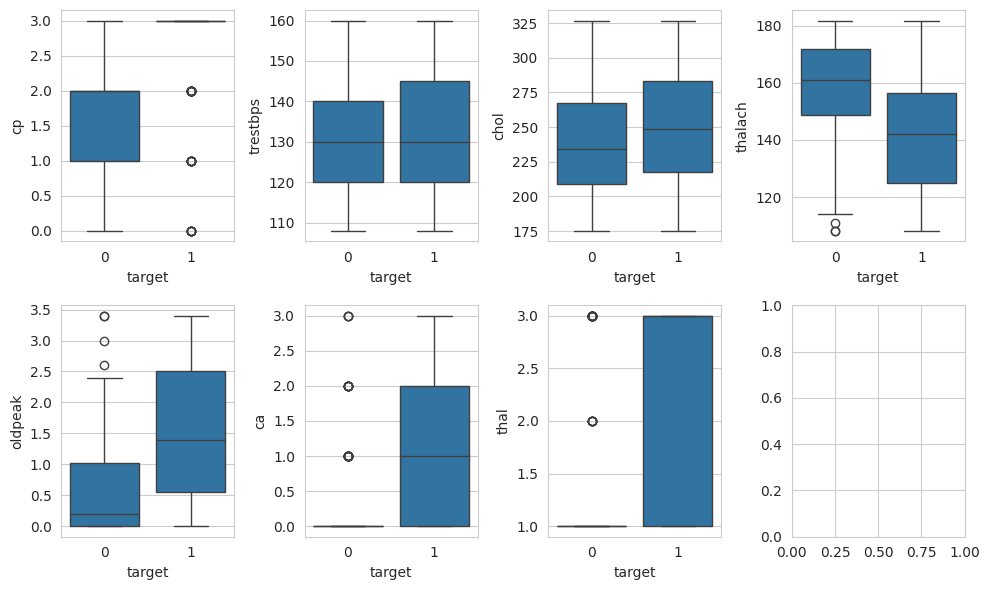

In [ ]:
#Re-visualizing the distribution after clipping:
fig,ax=plt.subplots(2,4,figsize=(10,6))
for i,subplot in zip(features,ax.flatten()):
  sns.boxplot(data=df, x='target',y=i,ax=subplot)
plt.tight_layout()


## Data splitting

Split the cleaned dataset into training and testing sets.


In [ ]:
x=df.drop("target",axis=1)
y=df["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

## Feature engineering

Engineer new features and scale existing ones to improve model performance.


In [16]:
#Scale numerical features using StandardScaler
scalar= StandardScaler()
x_train_scaled=x_train.copy()
x_test_scaled=x_test.copy()
x_train_scaled[numerical_features]=scalar.fit_transform(x_train[numerical_features])
x_test_scaled[numerical_features]=scalar.fit_transform(x_test[numerical_features])

#apply polynomial features:
poly=PolynomialFeatures(degree=2, include_bias=False )
X_train_poly = poly.fit_transform(x_train_scaled)
X_test_poly = poly.transform(x_test_scaled)


## Model training

Train a Support Vector Machine (SVM) classifier on the prepared training data using an RBF kernel.


In [17]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# Fit the classifier to the training data
svm_classifier.fit(x_train_scaled, y_train)

SVC(C=1, random_state=42)

## Model optimization

Optimize the hyperparameters of the pre-trained SVM model using GridSearchCV.


In [18]:
# Define the parameter grid
param_grid={'C':[0.1,1,10],'gamma':[0.001,0.01,0.1,1],'kernel':['linear', 'rbf', 'poly', 'sigmoid']}

# Instantiate GridSearchCV
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(x_train_scaled,y_train)

# Print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best estimator
best_svm_classifier = grid_search.best_estimator_

Best hyperparameters: {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
Best score: 0.8345238095238094


## Model evaluation

Evaluate the performance of the best SVM model on the test set.


Accuracy: 0.8524590163934426
Precision: 0.96
Recall: 0.75
F1-score: 0.8421052631578947
AUC-ROC: 0.8577586206896552


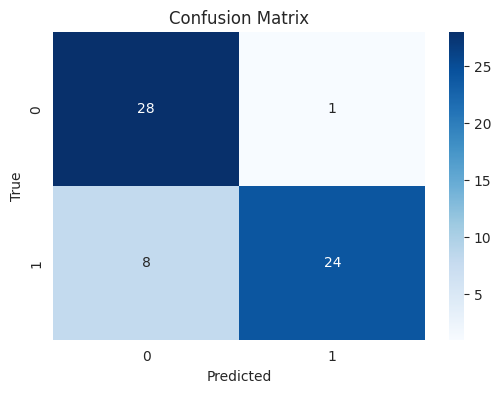

              precision    recall  f1-score   support

           0       0.78      0.97      0.86        29
           1       0.96      0.75      0.84        32

    accuracy                           0.85        61
   macro avg       0.87      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



In [20]:
# Predict the target variable for the test set
y_pred = best_svm_classifier.predict(x_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"AUC-ROC: {auc_roc}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Generate classification report
print(classification_report(y_test, y_pred))

## Summary:

### 1. Q&A
The task is to classify patients into two categories: 0 (no disease) and 1 (presence of disease) using a Support Vector Machine (SVM) classifier.  The analysis successfully completes this task, culminating in a model evaluation on a held-out test set.

### 2. Data Analysis Key Findings
* **Data Cleaning:** No missing values were found, but outliers were winsorized (clipped at the 5th and 95th percentiles).
* **Model Optimization:** GridSearchCV identified the best hyperparameters for the SVM as `{'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}` achieving a cross-validation accuracy of 0.8345.
* **Model Evaluation:** The optimized SVM model achieved the following performance on the test set:
    * Accuracy: 0.8524
    * Precision: 0.96
    * Recall: 0.75
    * F1-score: 0.8421
    * AUC-ROC: 0.8577

### 3. Insights or Next Steps
* **Further Hyperparameter Tuning:** Explore a wider range of hyperparameters or different optimization techniques to potentially improve model performance.

